# Combine batches

**Let's combine the batched soups and find out how many usable webscrapes we have**

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [41]:
for i in range(1,88):
    if i == 1:
        batch = pd.read_csv('./batch{}.csv'.format(i), index_col='index')
        batch.drop(batch.columns[0], axis=1, inplace=True)
    else:
        csv = pd.read_csv('./batch{}.csv'.format(i), index_col='index')
        csv.drop(csv.columns[0], axis=1, inplace=True)
        batch = pd.concat([batch, csv])

In [133]:
batch.isnull().sum()

HTML    0
dtype: int64

In [63]:
batch['index']

KeyError: 'index'

In [61]:
batch.loc[(batch['HTML'] == 'empty')]

,HTML
index,
50,empty
1532,empty
2344,empty
2024,empty
2376,empty
2377,empty
2860,empty
2963,empty
3333,empty


In [57]:
batch.fillna('empty', inplace=True)

In [64]:
batch.shape

(5077, 1)

In [65]:
df.shape

(7724, 14)

In [67]:
df.index

RangeIndex(start=0, stop=7724, step=1)

In [72]:
merged_df = pd.merge(df, batch, left_index=True, right_index=True, how='left')

In [19]:
#Empty HTML means successful request but no content.  Will fill in
batch1.loc[(batch1['HTML'].isnull())]

,Unnamed: 0,HTML
index,,
50,47,NaN


In [20]:
import requests
from bs4 import BeautifulSoup

In [94]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7724 entries, 0 to 7723
Data columns (total 15 columns):
Location                   7724 non-null object
Country                    7724 non-null object
Disease                    7724 non-null object
Species                    7724 non-null object
HM Alert ID                7724 non-null int64
Headline                   7724 non-null object
URL                        7724 non-null object
Issue Date                 7724 non-null object
Alert Tag                  7724 non-null object
Dup Count                  7724 non-null int64
Long                       7724 non-null float64
Lat                        7724 non-null float64
Smooshed Parser Extract    5170 non-null object
Place Categories           193 non-null object
HTML                       7724 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 905.2+ KB


In [93]:
merged_df['HTML'].isnull().sum()

0

In [83]:
merged_df.loc[merged_df['URL'] == 'deleted', 'HTML'] = 'deleted'

In [92]:
merged_df['HTML'] = merged_df['HTML'].fillna('request error')

In [89]:
merged_df.iloc[18, :]

Location                                                 Ohio, United States
Country                                                        United States
Disease                                                   Waterborne Illness
Species                                                               Humans
HM Alert ID                                                          5380983
Headline                       The Ohio County Monitor - Ohio County Monitor
URL                        http://news.google.com/news/url?sa=t&fd=R&ct2=...
Issue Date                                                    10/14/17 12:11
Alert Tag                                                            Context
Dup Count                                                                  0
Long                                                                -83.0127
Lat                                                                  40.2459
Smooshed Parser Extract     XXXXXX Email FRANKFORT, Ky. ÛÓ Acting to end...

In [100]:
merged_df.head(50)

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,HTML
0,"Delaware, United States",United States,Waterborne Illness,Humans,5407609,Kutcher tells Council about water situation - ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/27/17 1:11,Breaking,0,-75.498100,38.993500,XXXXXX Murray Ledger and Times,NaN,"<!DOCTYPE html PUBLIC ""-//W3C//DTD XHTML 1.0 S..."
1,"Kentucky, United States",United States,Waterborne Illness,Humans,5407269,"Under boil order, Murray awaits water test res...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 18:33,Breaking,8,-84.462898,37.439899,XXXXXX WPSD Local 6,NaN,<!DOCTYPE html>\r\n<!--[if lt IE 7]><html lang...
2,Puerto Rico,United States,Waterborne Illness,Humans,5405438,Puerto Ricans at Risk of Waterborne Disease Ou...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 7:20,Warning,0,-66.501404,18.251301,XXXXXX Close Embed this video More videos (1...,Natural disaster related,"<!DOCTYPE html>\r\n<html lang=""en""><head prefi..."
3,"Michigan, United States",United States,Waterborne Illness,Humans,5404851,"Howes: In Flint water war, city only has one c...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/26/17 0:02,Breaking,1,-84.462898,43.580299,XXXXXX FacebookEmail Twitter Google+ LinkedIn...,NaN,"<!DOCTYPE html>\r\n<!--[if IE 8]><html class=""..."
4,"Pennsylvania, United States",United States,Waterborne Illness,Humans,5404604,DEP orders PWSA to make critical infrastrucure...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/25/17 18:19,Breaking,0,-77.475601,40.930099,XXXXXX {copyShortcut} to copy Link copied! Up...,NaN,"<!DOCTYPE html>\r\n<html class=""no-js"" lang=""e..."
5,"Texas, United States",United States,Waterborne Illness,Humans,5403950,Private water wells in Texas test positive for...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/25/17 14:36,Breaking,0,-99.228600,31.240900,XXXXXX XXXXXX Chron.com,NaN,<!-- hearst/home/commentsInit.tpl --><!-- e he...
6,"Michigan, United States",United States,Waterborne Illness,Humans,5401796,How long it could take to repair massive Oakla...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/24/17 11:31,Context,2,-84.462898,43.580299,XXXXXX How long it could take to repair massi...,NaN,"<!DOCTYPE html>\r\n<html class=""ltr no-js"" dir..."
7,"Louisiana, United States",United States,Waterborne Illness,Humans,5398814,"Boil water advisories issued for Clinton, Wils...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/23/17 12:47,Breaking,2,-92.021500,31.015200,XXXXXX WBXH,NaN,"<!DOCTYPE html PUBLIC ""-//W3C//DTD HTML 4.01 T..."
8,"Tupelo, Mississippi, United States",United States,Waterborne Illness,Humans,5397122,Happening Now BREAKING- Boil Water Order Lifte...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/21/17 14:27,Context,9,-88.703384,34.257607,NaN,NaN,"<!DOCTYPE html>\r\n<html lang=""en-US"">\r\n<hea..."
9,"Astoria, Oregon, United States",United States,Waterborne Illness,Humans,5395641,Boil water order lifted in Astoria - Daily Ast...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/21/17 13:17,Context,4,-123.831253,46.187881,XXXXXX Boil water order lifted in Astoria Som...,NaN,"<!DOCTYPE html>\r\n<html class=""no-js"" lang=""""..."


In [95]:
merged_df.loc[(merged_df['URL'] == 'deleted')]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,HTML
23,"Idaho, United States",United States,Waterborne Illness,Humans,5375030,About 100 Jerome homes under boil order - KMVT,deleted,10/11/17 18:19,Breaking,2,-114.191902,43.644001,XXXXXX XXXXXX KMVT,NaN,deleted
46,"Mayetta, Kansas, United States",United States,Waterborne Illness,Humans,5336960,"Boil order for the City of Mayetta, Jackson Co...",deleted,9/23/17 18:38,Context,0,-95.722481,39.338890,XXXXXX XXXXXX WIBW,NaN,deleted
55,"Belton, Texas, United States",United States,Waterborne Illness,Humans,5328884,Belton: Dog Ridge Water Supply Corp. issues bo...,deleted,9/19/17 11:29,Context,0,-97.464447,31.056009,XXXXXX Belton: Dog Ridge Water Supply Corp. i...,NaN,deleted
102,"Cleveland County, Oklahoma, United States",United States,Waterborne Illness,Humans,5290083,Boil order issued Friday for part of Cleveland...,deleted,9/1/17 17:46,Warning,2,-97.300308,35.200069,XXXXXX Boil order issued Friday for part of C...,NaN,deleted
175,"Ketchikan, Alaska, United States",United States,Waterborne Illness,Humans,5251409,High levels of wastewater bacteria found at Al...,deleted,8/15/17 9:24,Warning,0,-131.646103,55.342220,XXXXXX High levels of wastewater bacteria fou...,NaN,deleted
287,"Newport, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.312828,41.490101,NaN,NaN,deleted
288,"North Kingstown, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.466171,41.550102,NaN,NaN,deleted
289,"Portsmouth, Rhode Island, United States",United States,Waterborne Illness,Humans,5207423,Several more RI beaches closed to swimming due...,deleted,7/26/17 16:31,Warning,2,-71.250328,41.602325,NaN,NaN,deleted
385,"Benton County, Arkansas, United States",United States,Waterborne Illness,Humans,5177872,Boil order issued in Benton - Benton Courier,deleted,7/15/17 22:21,Warning,0,-94.333542,36.333412,XXXXXX Benton Courier,NaN,deleted
442,"Pennyrile Forest State Resort Park, Kentucky, ...",United States,Waterborne Illness,Humans,5157049,Pennyrile Beach closed because of e. coli - Th...,deleted,7/7/17 1:09,Warning,2,-87.663223,37.073090,XXXXXX The Messenger (subscription),NaN,deleted


In [96]:
merged_df.loc[(merged_df['HTML'] == 'empty')]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,HTML
50,"Pender County, North Carolina, United States",United States,Waterborne Illness,Humans,5334651,Pender County rescinds boil order - Port City ...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,9/22/17 12:22,Context,0,-77.966377,34.500439,XXXXXX Port City Daily,NaN,empty
1532,"New Leipzig, North Dakota, United States",United States,Waterborne Illness,Humans,4037872,New Leipzig Remains Under Boil Order - KXNet.com,http://news.google.com/news/url?sa=t&fd=R&ct2=...,2/19/16 19:16,Warning,0,-101.939873,46.376122,XXXXXX KXNet.com,NaN,empty
2024,"Slab Fork, West Virginia, United States",United States,Waterborne Illness,Humans,3540810,"Boil order for all of Slab Fork, WV due to pos...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,7/27/15 16:29,Warning,0,-81.331490,37.687061,"XXXXXX Boil order for all of Slab Fork, WV du...",NaN,empty
2344,"Wilmington, North Carolina, United States",United States,Waterborne Illness,Humans,3297529,Water main break prompts boil water advisory i...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,4/14/15 11:50,Warning,0,-77.944710,34.225727,NaN,NaN,empty
2376,"Burke County, North Dakota, United States",United States,Waterborne Illness,Humans,3243822,"Boil Order Continues in Burke, Divide Counties...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,3/20/15 10:38,Warning,8,-102.518257,48.791000,"XXXXXX Boil Order Continues in Burke, Divide ...",NaN,empty
2377,"Divide County, North Dakota, United States",United States,Waterborne Illness,Humans,3243822,"Boil Order Continues in Burke, Divide Counties...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,3/20/15 10:38,Warning,8,-103.487350,48.814892,"XXXXXX Boil Order Continues in Burke, Divide ...",NaN,empty
2860,"Kyle Canyon, Nevada, United States",United States,Waterborne Illness,Humans,2652297,BREAKING NEWS: Boil-water order lifted for Kyl...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/1/14 13:43,Context,2,-115.445290,36.294689,XXXXXX Boil-water order lifted for Kyle Canyo...,NaN,empty
2963,"Fairmont, West Virginia, United States",United States,Waterborne Illness,Humans,2581057,Boil Water Advisory Issued for Country Club Ro...,http://news.google.com/news/url?sa=t&fd=R&ct2=...,7/1/14 20:21,Warning,0,-80.142578,39.485085,XXXXXX WBOY-TV,NaN,empty
3311,"Putnam County, West Virginia, United States",United States,Waterborne Illness,Humans,2185512,Boil water notice lifted in northern Putnam Co...,http://news.google.com/news/url?sa=t&fd=R&usg=...,1/17/14 19:03,Context,0,-81.883186,38.516762,XXXXXX Boil water notice lifted in northern P...,Ban/Warning lifted,empty
3316,"Clendenin, West Virginia, United States",United States,Waterborne Illness,Humans,2181659,Boil water notice issued for parts of Clendeni...,http://news.google.com/news/url?sa=t&fd=R&usg=...,1/17/14 22:11,Warning,0,-81.348167,38.488708,XXXXXX Boil water notice issued for parts of ...,NaN,empty


(7724, 15)

In [104]:
num_empty = merged_df.loc[(merged_df['HTML'] == 'empty')].shape[0]
num_empty

228

In [106]:
num_request_err = merged_df.loc[(merged_df['HTML'] == 'request error')].shape[0]
num_request_err

299

In [113]:
num_usable = merged_df.shape[0] - num_deleted - num_empty - num_request_err
num_usable

4849

In [108]:
num_deleted = merged_df.loc[(merged_df['URL'] == 'deleted')].shape[0]
num_deleted

2348

In [102]:
merged_df.loc[(merged_df['HTML'] == 'request error')]

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,HTML
18,"Ohio, United States",United States,Waterborne Illness,Humans,5380983,The Ohio County Monitor - Ohio County Monitor,http://news.google.com/news/url?sa=t&fd=R&ct2=...,10/14/17 12:11,Context,0,-83.012703,40.245899,"XXXXXX Email FRANKFORT, Ky. ÛÓ Acting to end...",NaN,request error
64,"Cocoa, Florida, United States",United States,Waterborne Illness,Humans,5319289,"UPDATE: Cocoa Water Issues Cancels Boil Ban, D...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,9/15/17 12:10,Context,1,-80.741997,28.386120,XXXXXX SpaceCoastDaily.com,NaN,request error
138,"Trenton, Missouri, United States",United States,Waterborne Illness,Humans,5268112,Boil Water Advisory - Trenton Republican Times,http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/22/17 15:44,Warning,0,-93.616608,40.078899,NaN,NaN,request error
164,"Paddock Lake, Wisconsin, United States",United States,Waterborne Illness,Humans,5255225,"Aug. 16, 2017 lake test results: Paddock Hooke...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/16/17 15:44,Warning,1,-88.105087,42.577518,XXXXXX West of the I,NaN,request error
165,"Silver Lake, Wisconsin, United States",United States,Waterborne Illness,Humans,5255225,"Aug. 16, 2017 lake test results: Paddock Hooke...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/16/17 15:44,Warning,1,-88.492920,43.076611,XXXXXX West of the I,NaN,request error
166,"Center Lake, Camp Lake, Wisconsin, United States",United States,Waterborne Illness,Humans,5255225,"Aug. 16, 2017 lake test results: Paddock Hooke...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/16/17 15:44,Warning,1,-88.133430,42.537971,XXXXXX West of the I,NaN,request error
167,"Wheatland, Wisconsin, United States",United States,Waterborne Illness,Humans,5255225,"Aug. 16, 2017 lake test results: Paddock Hooke...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/16/17 15:44,Warning,1,-88.208420,42.593910,XXXXXX West of the I,NaN,request error
168,"Bristol, Wisconsin, United States",United States,Waterborne Illness,Humans,5255225,"Aug. 16, 2017 lake test results: Paddock Hooke...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,8/16/17 15:44,Warning,1,-88.049248,42.558910,XXXXXX West of the I,NaN,request error
240,"Goshen, Utah, United States",United States,Waterborne Illness,Humans,5219021,"2 years later, mandatory boil order still in p...",https://www.ksl.com/?sid=45245321&nid=148,8/1/17 0:54,Warning,1,-111.900772,39.953011,XXXXXX KSL.com,NaN,request error
368,"Center Lake, Camp Lake, Wisconsin, United States",United States,Waterborne Illness,Humans,5189513,"July 19, 2017 lake test results: Paddock Hooke...",http://news.google.com/news/url?sa=t&fd=R&ct2=...,7/19/17 12:47,Warning,0,-88.133430,42.537971,XXXXXX West of the I,NaN,request error


In [114]:
tags = ["Usable", "Deleted", "Empty", "Bad Requests"]
counts = [num_usable, num_deleted, num_empty, num_request_err]
print(tags)
print(counts)

['Usable', 'Deleted', 'Empty', 'Bad Requests']
[4849, 2348, 228, 299]


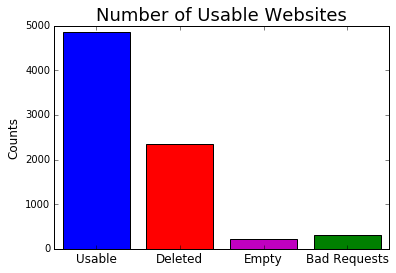

In [128]:
plt.bar(np.arange(len(tags)), counts, align='center', color=['b', 'r', 'm', 'g'])
plt.xticks(np.arange(len(tags)), tags, fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title("Number of Usable Websites", fontsize=18)

In [130]:
pd.to_datetime(merged_df['Issue Date'])

0      2017-10-27 01:11:00
1      2017-10-26 18:33:00
2      2017-10-26 07:20:00
3      2017-10-26 00:02:00
4      2017-10-25 18:19:00
5      2017-10-25 14:36:00
6      2017-10-24 11:31:00
7      2017-10-23 12:47:00
8      2017-10-21 14:27:00
9      2017-10-21 13:17:00
10     2017-10-21 13:17:00
11     2017-10-20 23:06:00
12     2017-10-20 13:42:00
13     2017-10-20 07:02:00
14     2017-10-19 18:36:00
15     2017-10-18 14:59:00
16     2017-10-18 12:08:00
17     2017-10-14 22:48:00
18     2017-10-14 12:11:00
19     2017-10-14 03:06:00
20     2017-10-13 19:15:00
21     2017-10-13 17:37:00
22     2017-10-12 16:36:00
23     2017-10-11 18:19:00
24     2017-10-10 13:13:00
25     2017-10-07 18:19:00
26     2017-10-07 06:01:00
27     2017-10-06 14:32:00
28     2017-10-06 13:21:00
29     2017-10-06 13:51:00
               ...        
7694   2011-06-22 16:32:00
7695   2011-06-22 00:02:00
7696   2011-06-21 19:43:00
7697   2011-06-21 10:57:00
7698   2011-06-21 10:25:00
7699   2011-06-21 09:18:00
7

In [135]:
merged_df.tail()

,Location,Country,Disease,Species,HM Alert ID,Headline,URL,Issue Date,Alert Tag,Dup Count,Long,Lat,Smooshed Parser Extract,Place Categories,HTML
7719,"Lake O' the Pines, Texas, United States",United States,Waterborne Illness,Humans,449959,Lake O' The Pines closed due to E. Coli outbre...,http://news.google.com/news/url?fd=R&sa=T&url=...,6/19/10 19:35,Breaking,1,-94.497139,32.751808,"XXXXXX KLTV 7 News Tyler, Longview, Jacksonvi...",NaN,request error
7720,"Missouri, United States",United States,Waterborne Illness,Humans,436974,DNR Has Improved Its Way of Informing Public R...,http://news.google.com/news/url?fd=R&sa=T&url=...,5/30/10 13:16,Context,1,-92.504898,38.238098,XXXXXX DNR Has Improved Its Way of Informing ...,NaN,request error
7721,"Saratoga Springs, Utah, United States",United States,Waterborne Illness,Humans,427961,Water Source of Campylobacter Outbreak in Utah...,http://news.google.com/news/url?fd=R&sa=T&url=...,5/15/10 5:01,Warning,3,-111.904655,40.349117,XXXXXX Water Source of Campylobacter Outbreak...,Foodborne outbreak,request error
7722,"Cape Girardeau County, Missouri, United States",United States,Waterborne Illness,Humans,424775,Apparent outbreak of E. coli from water at spo...,http://news.google.com/news/url?fd=R&sa=T&url=...,5/10/10 17:45,Breaking,2,-89.716766,37.383385,XXXXXX Apparent outbreak of E. coli from wate...,NaN,request error
7723,"Jackson, Missouri, United States",United States,Waterborne Illness,Humans,424683,E. coli outbreak near Cape Girardeau - St. Lou...,http://news.google.com/news/url?fd=R&sa=T&url=...,5/10/10 15:55,Breaking,4,-89.666206,37.382275,XXXXXX St. Louis Post-Dispatch (blog),NaN,request error
